In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from Backtest import *
np.random.seed(44)

In [4]:
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

df = yf.download("INFY.NS")[["Adj Close"]].pct_change(1)
df.columns = ["returns"]

df["returns t-1"] = df[["returns"]].shift(1)

df["mean returns 15"] = df[["returns"]].rolling(15).mean().shift(1)
df["mean returns 60"] = df[["returns"]].rolling(60).mean().shift(1)

df["volatility returns 15"] = df[["returns"]].rolling(15).std().shift(1)
df["volatility returns 60"] = df[["returns"]].rolling(60).std().shift(1)

df = df.dropna()

split = int(0.80*len(df))

X_train = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[:split]

y_train_reg = df[["returns"]].iloc[:split]

y_train_cla = np.round(df[["returns"]].iloc[:split]+0.5)

X_test = df[["returns t-1", "mean returns 15", "mean returns 60",
              "volatility returns 15",
              "volatility returns 60"]].iloc[split:]

y_test_reg = df[["returns"]].iloc[split:]
y_test_cla = np.round(df[["returns"]].iloc[split:]+0.5)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

[*********************100%%**********************]  1 of 1 completed


In [5]:
np.random.seed(69)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nb_hidden_layer = 1

classifier = Sequential()

for _ in range(nb_hidden_layer):
    # classifier.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))
    classifier.add(Dense(128, input_shape=(X_train.shape[1],), activation="relu"))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    classifier.add(Dense(1, activation="sigmoid"))
    classifier.add(Dense(1, activation="sigmoid"))

classifier.compile(loss="binary_crossentropy", optimizer="adam")

classifier.fit(X_train_scaled, y_train_cla, epochs=40, batch_size=32, verbose=1)
classifier.save('INFY.h5')

Epoch 1/40


2024-01-18 21:42:42.400463: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-18 21:42:44.027399: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbe80a9c7a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-18 21:42:44.027484: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-01-18 21:42:44.038164: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-18 21:42:44.070383: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705594364.182224   13030 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 [==============================] - 4s 8ms/step - loss: 0.9641
Epoch 2/40
175/175 [==============================] - 1s 8ms/step - loss: 0.7008
Epoch 3/40
175/175 [==============================] - 1s 8ms/step - loss: 0.6941
Epoch 4/40
175/175 [==============================] - 1s 8ms/step - loss: 0.6942
Epoch 5/40
175/175 [==============================] - 1s 8ms/step - loss: 0.6935
Epoch 6/40
175/175 [==============================] - 2s 11ms/step - loss: 0.6938
Epoch 7/40
175/175 [==============================] - 2s 13ms/step - loss: 0.6938
Epoch 8/40
175/175 [==============================] - 2s 11ms/step - loss: 0.6940
Epoch 9/40
175/175 [==============================] - 2s 9ms/step - loss: 0.6936
Epoch 10/40
175/175 [==============================] - 1s 7ms/step - loss: 0.6936
Epoch 11/40
175/175 [==============================] - 2s 9ms/step - loss: 0.6938
Epoch 12/40
175/175 [==============================] - 2s 9ms/step - loss: 0.6938
Epoch 13/40
175/175 [============

In [6]:
# import numpy as np
# import yfinance as yf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras import regularizers

# # Download data
# df = yf.download("INFY.NS")[["Adj Close"]].pct_change(1)
# df.columns = ["returns"]

# df["returns t-1"] = df[["returns"]].shift(1)

# df["mean returns 15"] = df[["returns"]].rolling(15).mean().shift(1)
# df["mean returns 60"] = df[["returns"]].rolling(60).mean().shift(1)

# df["volatility returns 15"] = df[["returns"]].rolling(15).std().shift(1)
# df["volatility returns 60"] = df[["returns"]].rolling(60).std().shift(1)

# df = df.dropna()

# # Split data
# split = int(0.80 * len(df))

# X = df[["returns t-1", "mean returns 15", "mean returns 60",
#         "volatility returns 15", "volatility returns 60"]]
# y_reg = df[["returns"]]
# y_cla = np.round(df[["returns"]] + 0.5)

# X_train, X_test, y_train_reg, y_test_reg, y_train_cla, y_test_cla = train_test_split(
#     X, y_reg, y_cla, test_size=0.2, random_state=42
# )

# # Standardize data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Build the model
# model = Sequential()
# model.add(Dense(128, input_shape=(X_train.shape[1],), activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(1, activation="sigmoid"))

# # Compile the model
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Train the model
# model.fit(X_train_scaled, y_train_cla, epochs=50, batch_size=32, verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test_scaled, y_test_cla)
# print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# # Save the model
# model.save('improved_INFY.h5')


219/219 [==============================] - 1s 3ms/step


[*********************100%%**********************]  1 of 1 completed


    -----------------------------------------------------------------------------
    Beta: 0.694 	 Alpha: 8.72 %	     Sharpe: 0.955 	 Sortino: 0.083
  -----------------------------------------------------------------------------
    VaR: 3.47 %	 cVaR: 4.31 % 	     VaR/cVaR: 1.242 	 drawdown: 83.0 %
  -----------------------------------------------------------------------------


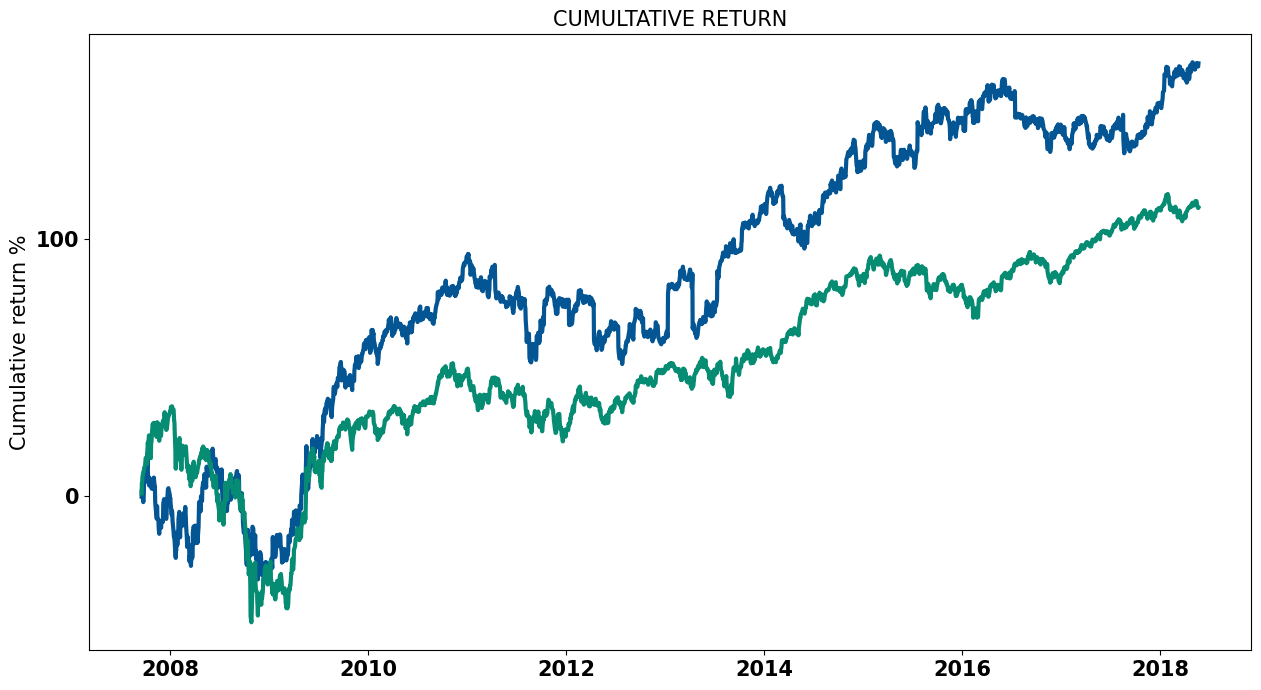

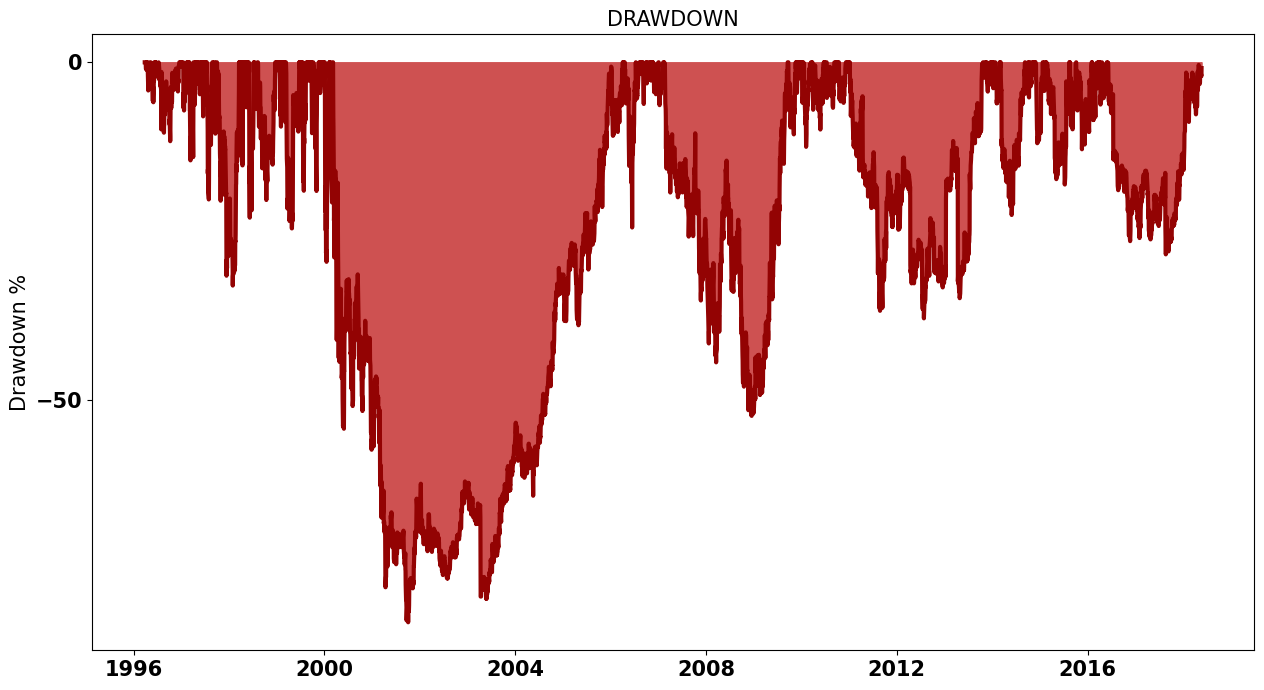

In [7]:
df["prediction"] = classifier.predict(np.concatenate((X_train,X_test),axis=0))

# df["prediction"] = model.predict(np.concatenate((X_train,X_test),axis=0))

df["prediction"] = np.where(df["prediction"] == 0, -1,1)
df["strategy"] = np.sign(df["prediction"]) * df["returns"]

backtest_dynamic_portfolio(df["strategy"].iloc[:split])

In [18]:
df

,returns,returns t-1,mean returns 15,mean returns 60,volatility returns 15,volatility returns 60,prediction,strategy
Date,,,,,,,,
1996-03-26,-0.013361,-0.011760,-0.000028,0.002863,0.015410,0.019282,1,-0.013361
1996-03-27,0.007194,-0.013361,-0.000919,0.002707,0.015790,0.019376,1,0.007194
1996-03-28,0.021114,0.007194,0.001436,0.002714,0.013972,0.019377,1,0.021114
1996-03-29,0.034770,0.021114,0.000914,0.003176,0.012982,0.019482,1,0.034770
1996-04-01,0.000000,0.034770,0.002683,0.003953,0.015596,0.019800,1,0.000000
...,...,...,...,...,...,...,...,...
2024-01-12,0.079340,-0.016909,-0.001769,0.001026,0.013556,0.013799,1,0.079340
2024-01-15,0.024399,0.079340,0.003538,0.002313,0.024967,0.017108,1,0.024399
2024-01-16,-0.012439,0.024399,0.003997,0.002624,0.025303,0.017339,1,-0.012439


In [19]:
np.random.seed(69)

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 1

regressor = Sequential()

for _ in range(nb_hidden_layer):
    regressor.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))

regressor.add(Dense(1, activation="linear"))

regressor.compile(loss="mse", optimizer="adam")

regressor.fit(X_train_scaled, y_train_reg, epochs=13, batch_size=32, verbose=1)

Epoch 1/13
175/175 [==============================] - 2s 8ms/step - loss: 0.0212
Epoch 2/13
175/175 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 3/13
175/175 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 4/13
175/175 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 5/13
175/175 [==============================] - 1s 5ms/step - loss: 9.6222e-04
Epoch 6/13
175/175 [==============================] - 1s 5ms/step - loss: 8.8575e-04
Epoch 7/13
175/175 [==============================] - 1s 5ms/step - loss: 8.5609e-04
Epoch 8/13
175/175 [==============================] - 2s 9ms/step - loss: 8.1296e-04
Epoch 9/13
175/175 [==============================] - 1s 8ms/step - loss: 8.1187e-04
Epoch 10/13
175/175 [==============================] - 1s 5ms/step - loss: 7.9054e-04
Epoch 11/13
175/175 [==============================] - 1s 5ms/step - loss: 7.7974e-04
Epoch 12/13
175/175 [==============================] - 2s 9ms/step - loss: 7.65

219/219 [==============================] - 1s 2ms/step


[*********************100%%**********************]  1 of 1 completed



    -----------------------------------------------------------------------------
    Beta: 0.838 	 Alpha: 12.27 %	     Sharpe: 0.879 	 Sortino: 0.073
  -----------------------------------------------------------------------------
    VaR: 2.6 %	 cVaR: 3.19 % 	     VaR/cVaR: 1.23 	 drawdown: 36.55 %
  -----------------------------------------------------------------------------


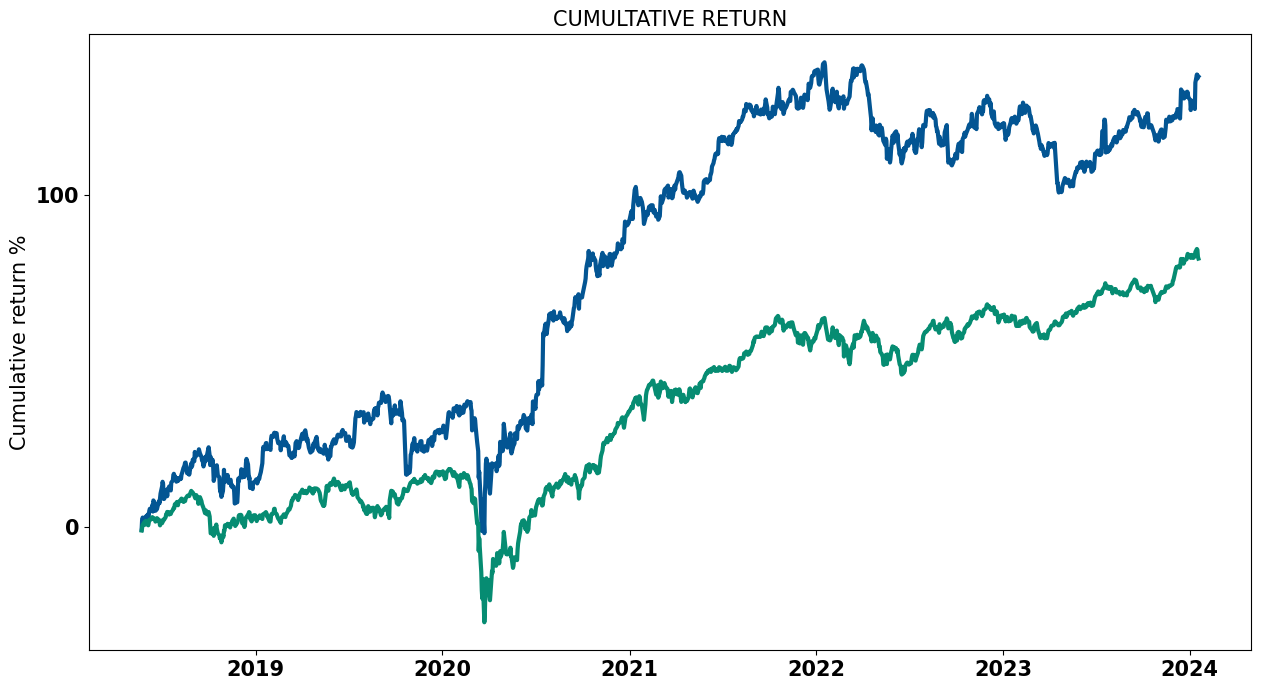

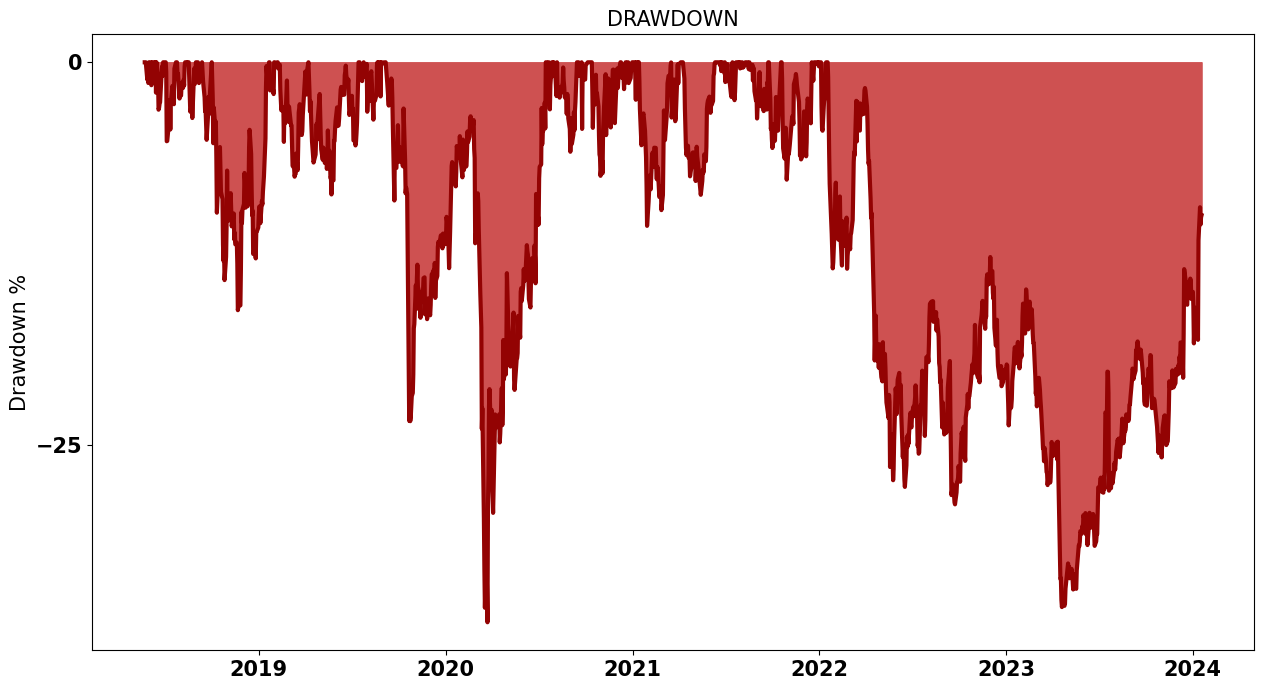

In [20]:
df["prediction"] = regressor.predict(np.concatenate((X_train,X_test),
                                    axis=0))

df["strategy"] = np.sign(df["prediction"]) * df["returns"]

backtest_dynamic_portfolio(df["strategy"].iloc[split:])

In [21]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.keras.backend as F

def ALPHA_MSE(y_true, y_pred):
    y_true_roll = tf.roll(y_true, shift=1, axis=0)
    y_pred_roll = tf.roll(y_pred, shift=1, axis=0)
    y_true_dif = tf.math.sign(y_true_roll-y_true)
    y_pred_dif = tf.math.sign(y_pred_roll-y_pred)
    booleen_vector = y_true_dif == y_pred_dif
    alpha = tf.where(booleen_vector, 1, 3)
    alpha = tf.cast(alpha, dtype=tf.float32)
    mse = F.square(y_true-y_pred)
    mse = tf.cast(mse, dtype=tf.float32)
    scale_mse = tf.multiply(alpha, mse)
    alpha_mse = F.mean(scale_mse)
    return alpha_mse

ModuleNotFoundError: No module named 'tensorflow_probability'

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nb_hidden_layer = 3

np.random.seed(15)
regressor = Sequential()

for _ in range(nb_hidden_layer):
    regressor.add(Dense(75, input_shape = (X_train.shape[1],), activation="relu"))

regressor.add(Dense(1, activation="linear"))

regressor.compile(loss=ALPHA_MSE, optimizer="adam")

regressor.fit(X_train_scaled, y_train_reg, epochs=13, batch_size=32, verbose=1)

df["prediction"] = regressor.predict(np.concatenate((X_train,X_test),axis=0))

df["strategy"] = np.sign(df["prediction"]) * df["returns"]

from Backtest import *
backtest_dynamic_portfolio(df["strategy"].iloc[split:])